##Nearest neighborhood Method

Mounted at /content/drive
Zooming factor :  4
Shape of original image:  (365, 600, 3)
Shape of the zoomed image:  (1460, 2400, 3)


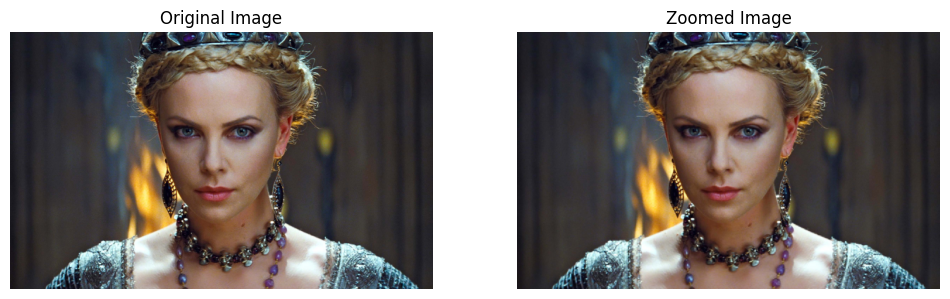

SSD value between original and zoomed images:  1509065900.0


In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

f=cv.imread('/content/drive/MyDrive/openCV/a1images/a1images/a1q5images/im03small.png',cv.IMREAD_COLOR)
f_rgb = cv.cvtColor(f,cv.COLOR_BGR2RGB)

def ssd(img1,img2):
  if img1.shape != img2.shape:
    img1 = cv.resize(img1, (img2.shape[1], img2.shape[0]), interpolation=cv.INTER_LINEAR)
  img1 = img1.astype(np.float32)
  img2 = img2.astype(np.float32)
  return np.sum((img1-img2)**2)

def Zoom_Image_nearest(img ,factor):
  if not(0<factor<= 10):
    raise ValueError("Zoom factor must be in range (0,10])")

  H,W,C = img.shape
  new_H = int(H*factor)
  new_W = int(W*factor)
  zoomed = np.zeros((new_H,new_W,C),dtype=img.dtype)

  for y_new in range(new_H):
    for x_new in range(new_W):
      y_near = int(round(y_new/factor))
      x_near = int(round(x_new/factor))
      y_near = min(max(y_near, 0), H - 1)
      x_near = min(max(x_near, 0), W - 1)
      zoomed[y_new,x_new] = img[y_near , x_near]

  print("Shape of original image: ",img.shape)
  print("Shape of the zoomed image: ", zoomed.shape)
  return zoomed

factor = 4
print("Zooming factor : ",factor)
zoomed=Zoom_Image_nearest(f ,factor)

zoomed_rgb = cv.cvtColor(zoomed,cv.COLOR_BGR2RGB)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1),plt.imshow(f_rgb),plt.title('Original Image'),plt.axis('off')
plt.subplot(1,2,2),plt.imshow(zoomed_rgb),plt.title('Zoomed Image'),plt.axis('off')
plt.show()
img_original = cv.imread('/content/drive/MyDrive/openCV/a1images/a1images/a1q5images/im03.png',cv.IMREAD_COLOR)
print("SSD value between original and zoomed images: ", ssd(zoomed,img_original))